<a href="https://colab.research.google.com/github/AngiePS/NotasPED/blob/main/PCA_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import svd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Ideia do projeto, encontrar os componentes principais de faces o que leva a um futuro estudo de reconhecimento facial.

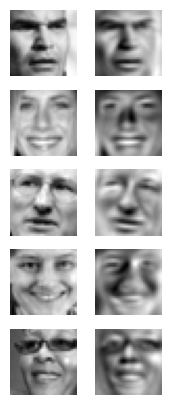

In [ ]:
fig,axis = plt.subplots(5,2,figsize=(2,5))
for i in range(5):
    j=np.random.randint(0,len(X)+1)
    axis[i,0].imshow(X[j,:].reshape(32,32,order="F"),cmap="gray")
    axis[i,0].axis("off")
    axis[i,1].imshow(X_rec[j,:].reshape(32,32,order="F"),cmap="gray")
    axis[i,1].axis("off")

## O PCA é uma transformação linear ortogonal que transforma os dados para um novo sistema de coordenadas de forma que a maior variância por qualquer projeção dos dados fica ao longo da primeira coordenada (o chamado primeiro componente), a segunda maior variânça fica ao longo da segunda coordenada, e assim por diante.



## Ou seja que no PCA vamos transformar os dados, usando projeções vamos organizar as varianças dadas nos dados originais em comparação com os dados transformados

## Para isso precisamos saber o que é uma projeção

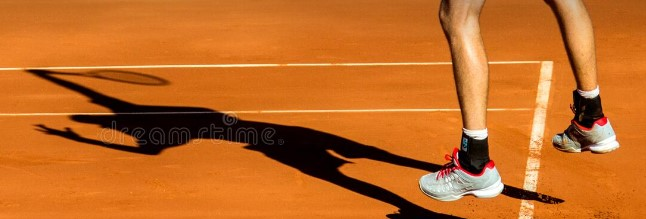

## Projeção matemática

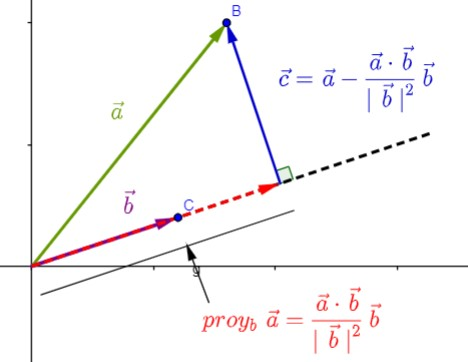

## Cómo usamos a projeção? Lembremos que precisamos dos dados projetados para analisar as varianças entre os dados iniciais e os dados projetados

## Normalização: significa ajustar valores medidos em diferentes escalas para uma escala teoricamente comum

##Ex: $z = \frac{x  -  \min{x}}{\max{x}  - \min{x}}$

## Ex: Passar os dadoss 4, 6, 8, 9, 13 a escala entre 0 e 1, fazemos $\frac{x - 4}{13 - 4} = \frac{x - 4}{9} $, fazendo a normalização obtemos



*   $\frac{4 - 4}{9} = \frac{0}{9} = 0 $

*   $\frac{6 - 4}{9} = \frac{2}{9} < 1 $

*   $\frac{8 - 4}{9} = \frac{4}{9} < 1 $

*   $\frac{9 - 4}{9} = \frac{5}{9} < 1 $

*   $\frac{13 - 4}{9} = \frac{9}{9} = 1 $


## os novos valores (normalizados) são  $0, \frac{2}{9}, \frac{4}{9}, \frac{5}{9}, 1$



## A normalização é feita para ter os dados numa mesma escala a maioria das vezes o pessoal que trabalha em computação gosta de deixar os dados entre 0 e 1 isto é no intervalo [0,1], como no exemplo, essa normalização deixa a escala entre 0 e 1

## De fato em aprendizado de máquina se usa muito a estatistica e a probabilidade o método PCA é de fato um método estatistico, aqui vamos usar uma normalização usada em probabilidade, usando media e desvio padrão

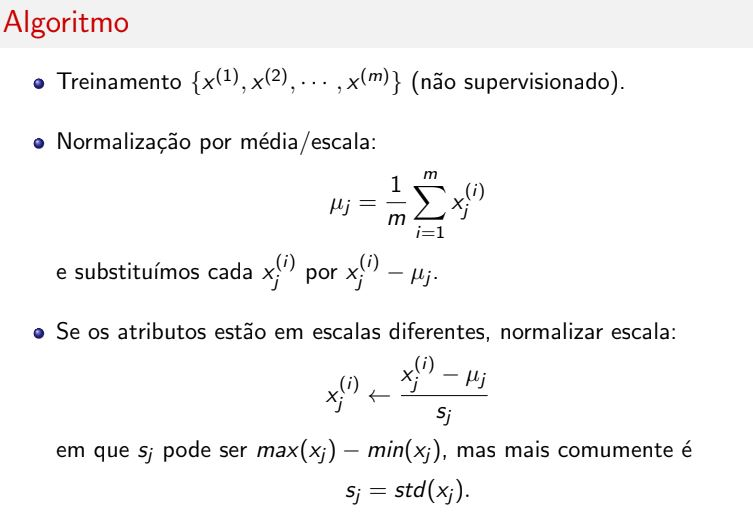

In [ ]:
mat = loadmat("/content/drive/MyDrive/MT571/dado1.mat")
X = mat["X"]

In [ ]:
print(X.shape)

(5000, 1024)


## Cada linha corresponde a imagens de faces em tons de cinza, com tamanho original 32 × 32, mas convertidas para um vetor de 1024 componentes.

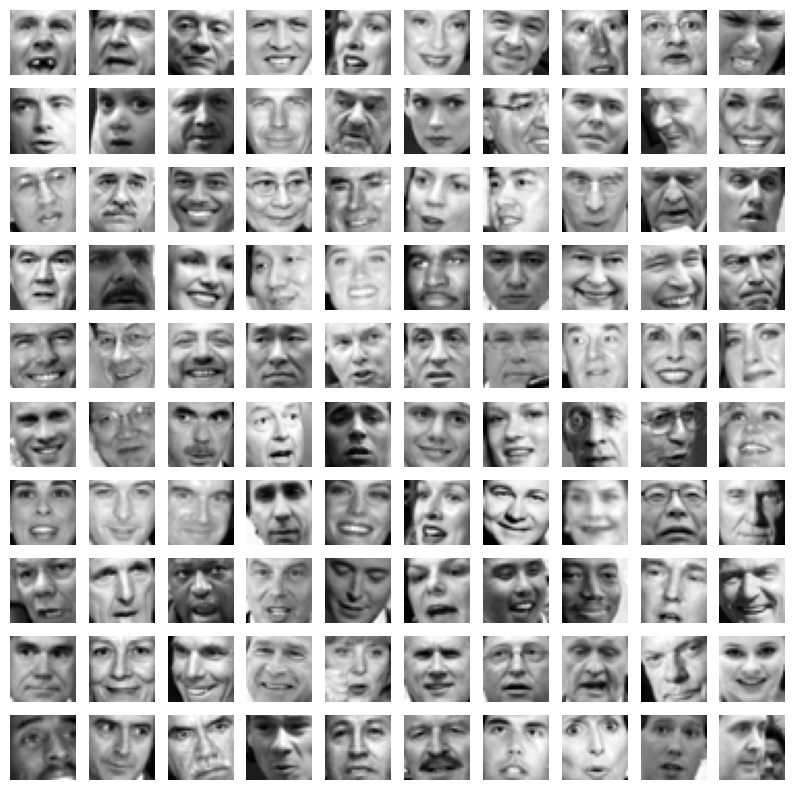

In [ ]:
#---------------------------------
# Mostrando 100 imagens aleatorias
fig,axis = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,4999),:].reshape(32,32,order="F"),cmap="gray")
        axis[i,j].axis("off")

In [ ]:
def normal(xe):
    mu = np.mean(xe,axis=0)
    std = np.std(xe,axis=0)
    xe_norm = (xe-mu)/std
    return xe_norm,std,mu

## Para a seguinte parte do algoritmo precisamos de diferentes definições que não foram vistas no curso a mais relevante é a definição de valores singulares, um valor singular de uma matriz A é a raiz quadrada de um autovalor de $A^t \cdot A$

## O resumo da seguinte parte do algoritmo é

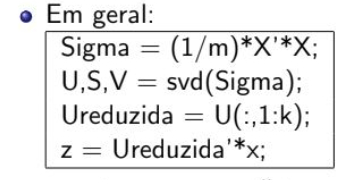

#Funções

In [ ]:
def algpca(xe):
    m = xe.shape[0]
    n = xe.shape[1]
    sig=np.zeros((n,n))
    for j in range(m):
      sig = sig + 1/m * xe.T @ xe

    U,S,V = svd(sig)
    return U,S,V

In [ ]:
def projectData(X,U,K):
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))

    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]

    return Z

In [ ]:
X.shape

(5000, 1024)

In [ ]:
Z.shape

(5000, 100)

## Agora precisamos reconstruir os dados

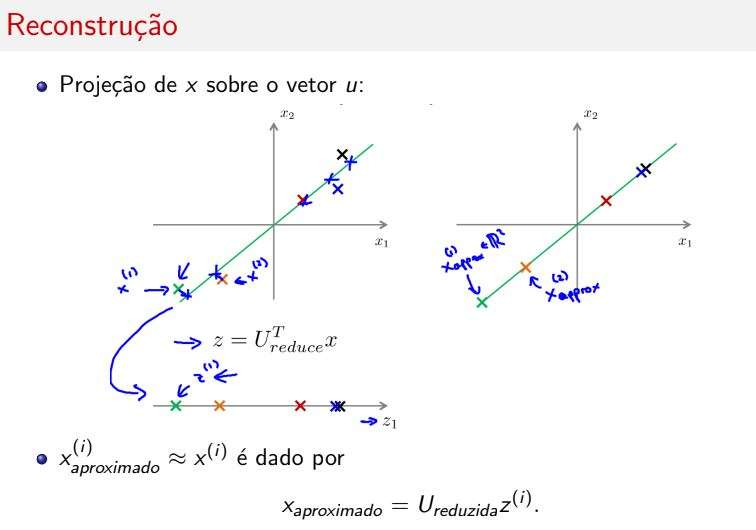

In [ ]:
def recoverData(Z,U,K):
    m,n = Z.shape[0],U.shape[1]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]

    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T

    return X_rec

## Agora usamos todas as funções e a teoria

#Aplicamos o PCA aos dados normalizados

In [ ]:
X_normal,std_normal,mu_normal = normal(X)
U_normal, S_normal = algpca(X_normal)[:2]    # 38 min

#Eigenfaces correspondentes aos 36 primeiros componentes principais.

## São chamadas de eigenfaces porque usam os autovetores (eigenvectors) aqui ainda não se usa a recuperação da informação só a decomposição SVD

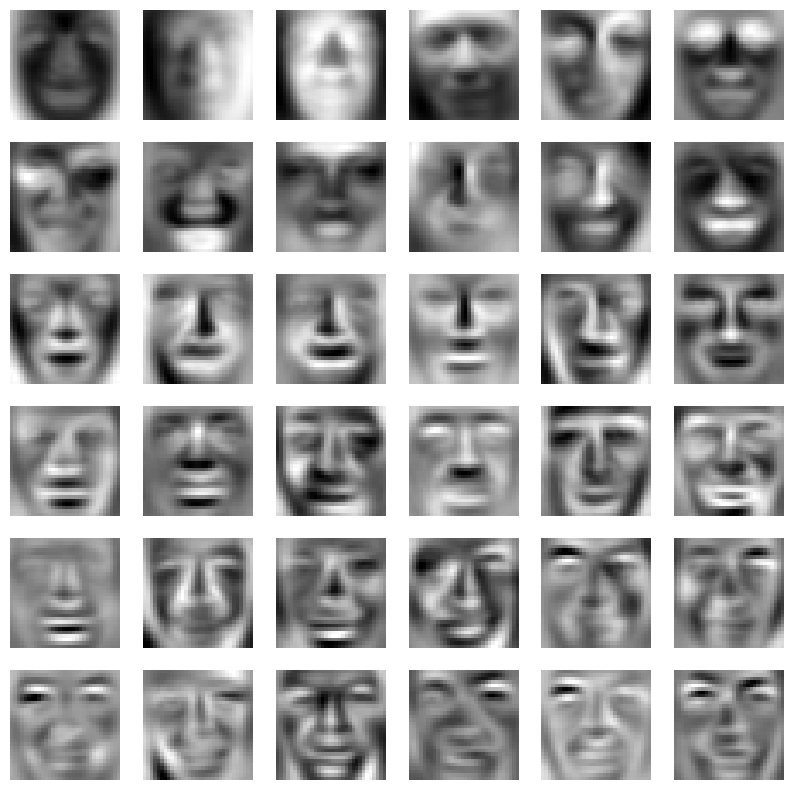

In [ ]:
u=U_normal[:,:36]
fig,axis = plt.subplots(6,6,figsize=(10,10))
k=0
for i in range(6):
    for j in range(6):
        axis[i,j].imshow(u[:,k].reshape(32,32,order="F"),cmap="gray")
        axis[i,j].axis("off")
        k+=1

#Graficamos os dados das duas primeiras colunas da matriz de dados, fazemos todo com as colunas porque na decomposição vamos encontrar os autovetores na columa da matriz





In [ ]:
(X[:,0]).shape

(5000,)

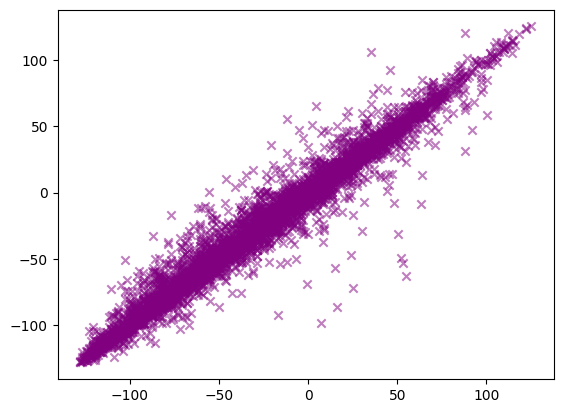

In [ ]:
plt.scatter(X[:,0],X[:,1],c="purple",marker="x",alpha=0.5)

## Comparamos as duas colunas originais com as duas colunas de dados recuperados

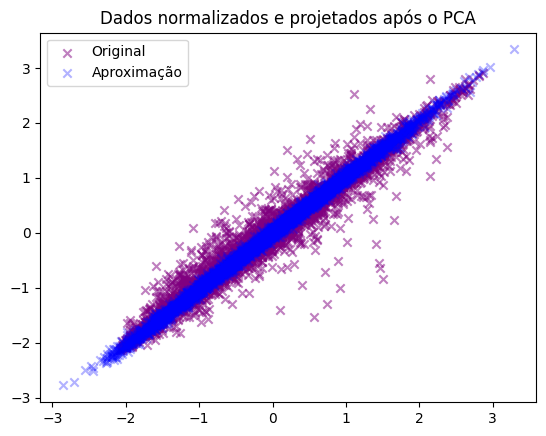

In [ ]:
plt.scatter(X_normal[:,0],X_normal[:,1],c="purple", marker="x",label="Original",alpha=0.5)
plt.scatter(X_rec[:,0],X_rec[:,1],c="blue",marker="x",label="Aproximação",alpha=0.3)
plt.title("Dados normalizados e projetados após o PCA")
plt.legend()

## Aproximação da primeira imagem

In [ ]:
print("Dado original:",X[0,:])

Dado original: [ -37.86631387  -45.86631387  -53.86631387 ... -110.86631387 -111.86631387
  -99.86631387]


In [ ]:
print("Dado normalizado:",X_normal[0,:])

Dado normalizado: [-0.31524019 -0.49758248 -0.69058357 ... -1.48595535 -1.43982921
 -1.18381859]


In [ ]:
X_rec = recoverData(Z,U_normal,K)
print("Aproximação do primeiro exemplo:",X_rec[0,:])

Aproximação do primeiro exemplo: [-0.24050631 -0.26139662 -0.30137928 ... -0.54852901 -0.25372376
  0.00390558]


## A maxima varianca é dada pelo autovetor principal que pela teoria vai ser o primeiro autovetor obtido na decomposição SVD (que é a primeira coluna da matriz U)

In [ ]:
print("Autovetor principal U(:,1) =:",U_normal[:,0])

Autovetor principal U(:,1) =: [-0.01425307 -0.01474233 -0.01501482 ... -0.00895052 -0.00769526
 -0.00692969]


## Vamos ver a comparação de algumas imagens originais com as imagens recuperadas depois de fazer o processo do PCA





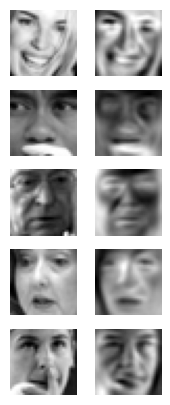

In [ ]:
fig,axis = plt.subplots(5,2,figsize=(2,5))
for i in range(5):
    j=np.random.randint(0,len(X)+1)
    axis[i,0].imshow(X[j,:].reshape(32,32,order="F"),cmap="gray")
    axis[i,0].axis("off")
    axis[i,1].imshow(X_rec[j,:].reshape(32,32,order="F"),cmap="gray")
    axis[i,1].axis("off")